In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

Importing reward matrix


In [ ]:
rewards = pd.read_excel('Grid.xlsx',header=None).values

Creating the environment

In [ ]:
# Extracting number of rows and columns of environment
rows = rewards.shape[0]
columns = rewards.shape[1]

# Q-values
# We will have 1 Q-value for each combination of state and action4
# Therefore for each of 2 actions, we have rows*columns states
q_values = np.zeros((rows,columns,2))

# Actions
# up=0 , right=1
actions = ['up', 'right']


Defining required functions

In [ ]:
# Function to check if we have reached to the destination
def des(row,col):
    if rewards[row,col] == np.max(rewards):
        return False
    else:
        return True


# Function to choose an action with using epsilon greedy algorithm
def action(row,col,epsilon):
    if row == 0:
        return 1
    elif col==columns-1:
        return 0

    if np.random.random() <= epsilon:
        return np.argmax(q_values[row,col])
    else:
        return np.random.randint(2)

# Function to Create next row and column numbers
def next_loc(row,col,act):
    new_row = row
    new_col = col
    if actions[act] == 'up' and row > 0:
        new_row -= 1
    elif actions[act] == 'right' and col<columns-1:
        new_col += 1

    return new_row, new_col

# Function to get the shortest path
def short_path(start_row,start_col):
    n=0
    row,col = start_row, start_col
    short_path = []
    short_path.append([row,col])
    while des(row,col):
        n+=1
        if n > 1000:
            break
        act = action(row,col, 1.)
        row,col = next_loc(row,col,act)
        short_path.append([row,col])
    return short_path

## Old try

**Running the algorithm**

Here the algorithm runs and creates the Q-value function.

In [ ]:
epsilon = .9
discount_factor = .9
learning_rate = .99
number_episodes = 8000
np.random.seed(69)
for e in range(number_episodes):

    row = rows-1
    col = 0
    while des(row,col):

        act = action(row,col,epsilon)
        # act = act_check(row,col,act)
        old_row, old_col = row, col
        row,col = next_loc(row,col,act)
        reward = rewards[row,col]
        old_q_value = q_values[old_row,old_col,act]
        new_q_value = (1-learning_rate)*old_q_value + learning_rate*(reward + discount_factor*np.max(q_values[row,col]))
        q_values[old_row,old_col,act] = new_q_value

print('DONE')

DONE


Getting the shortest path from the given starting point.

In [ ]:
path = short_path(29,0)

Calculations

In [ ]:
mask = np.zeros((rows,columns))
total_cost = []
for i in range(rows):
    for j in range(columns):
        if [i,j] in path:
            mask [i,j] = 1
            total_cost.append(rewards[i,j])
        else:
            mask [i,j] = 0

Printing the total cost of the created path

In [ ]:
total_cost = sum(total_cost)
print(f'Total cost of the chosen path is : {total_cost}')

Total cost of the chosen path is : 385


Showing the path on reward matrix

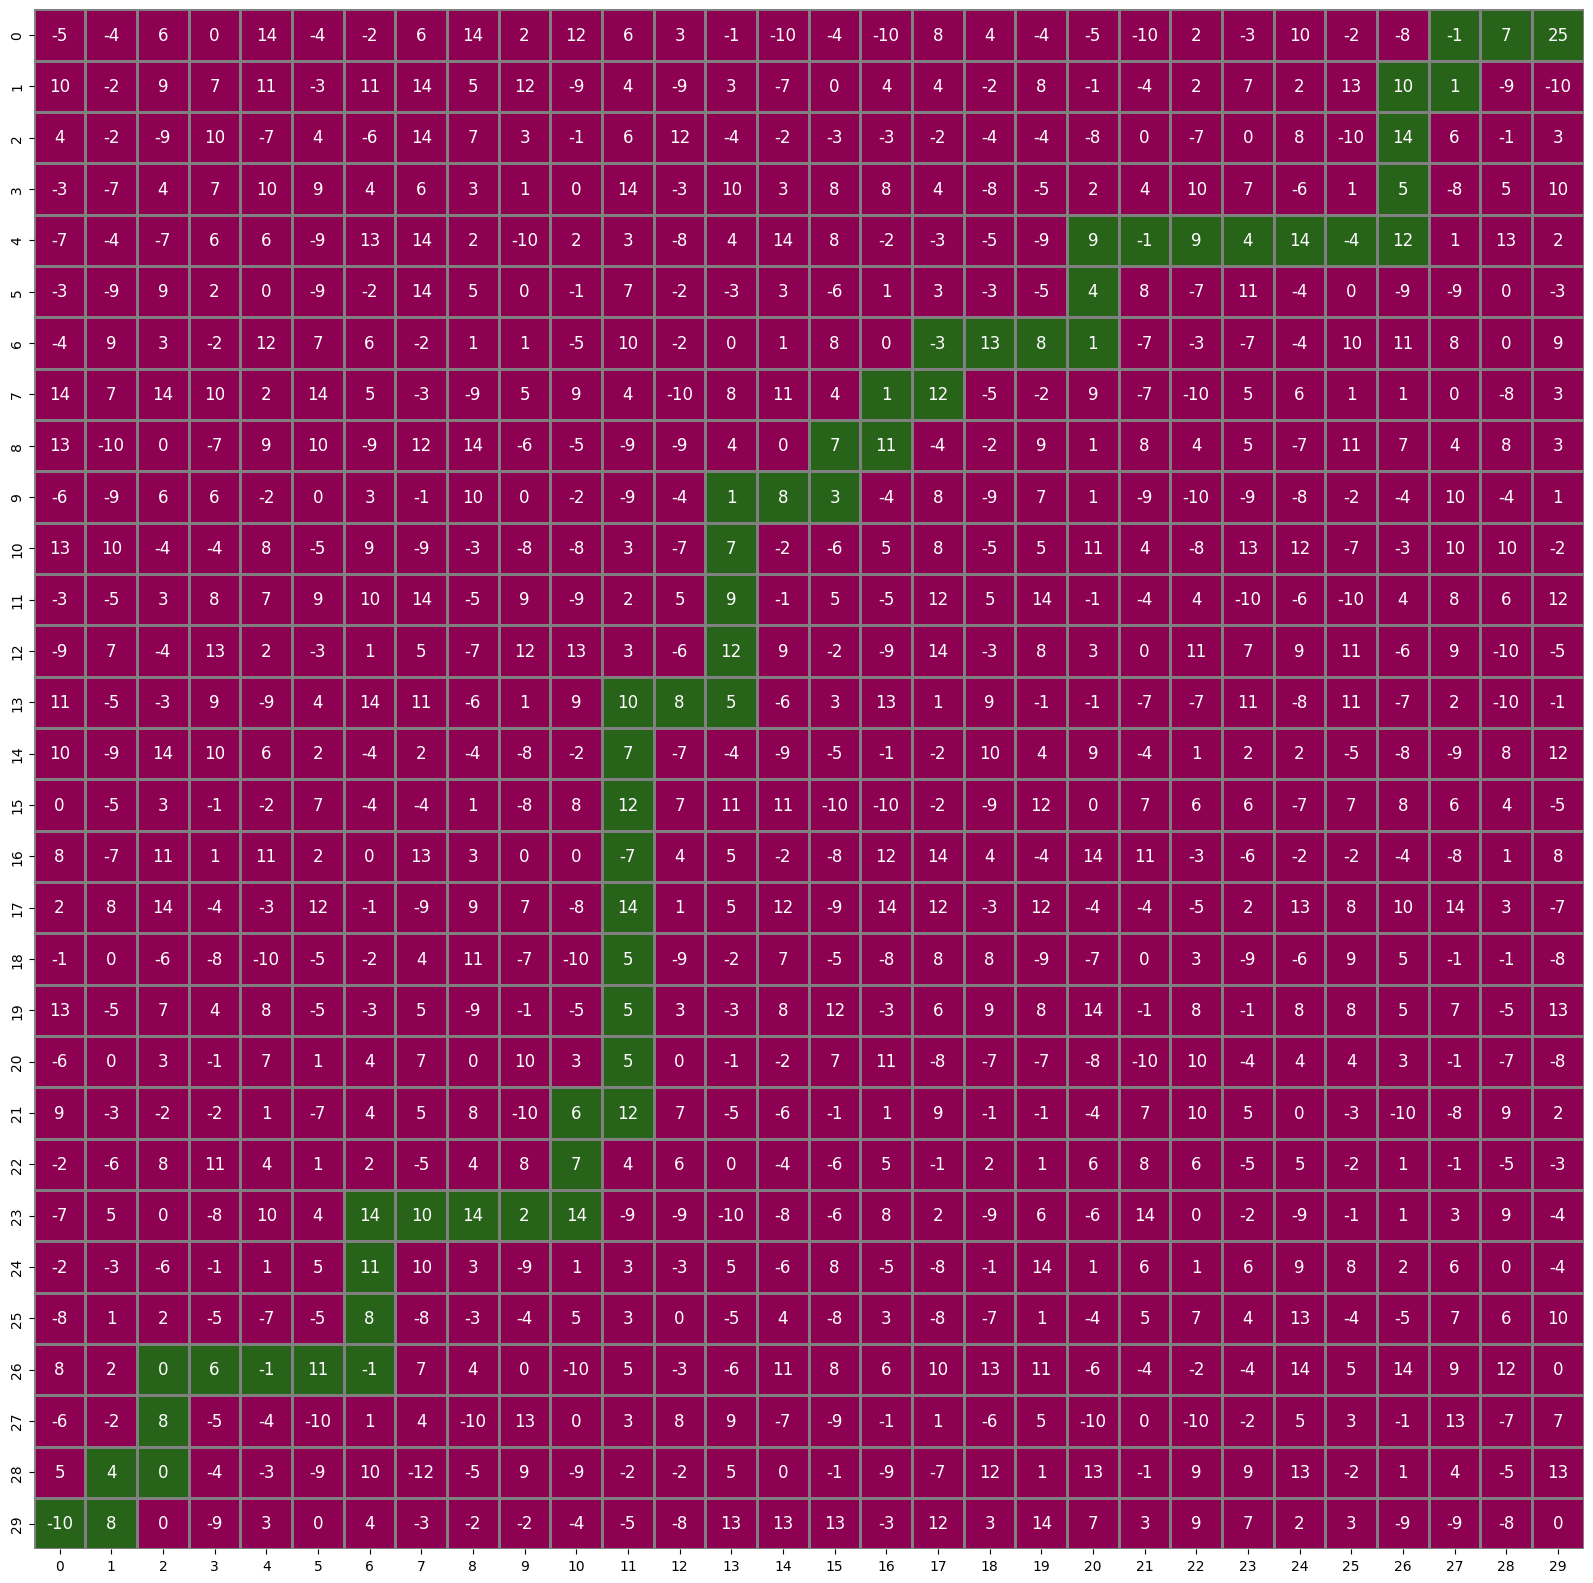

In [ ]:
plt.figure (figsize=(20,20))
sns.heatmap (mask, annot=False, annot_kws={"fontsize":10}, cmap="PiYG",cbar=False, linewidths=2, linecolor='gray')
for i in range(rewards.shape[0]):
    for j in range(rewards.shape[1]):
        annotation = rewards[i, j]
        plt.text(j + 0.5, i + 0.5, str(annotation), ha='center', va='center', color='white',fontsize = 12)

plt.savefig('path.png')

plt.show ()

## New Try

In [ ]:
q_values = np.zeros((rows,columns,2))

In [ ]:
epsilon = .5
discount_factor = .99
learning_rate = .99
number_episodes = 5000
a = []
b = []
c = []
np.random.seed(69)
for e in range(number_episodes):

    row = rows-1
    col = 0
    while des(row,col):

        act = action(row,col,epsilon)
        # act = act_check(row,col,act)
        old_row, old_col = row, col
        row,col = next_loc(row,col,act)
        reward = rewards[row,col]
        old_q_value = q_values[old_row,old_col,act]
        new_q_value = (1-learning_rate)*old_q_value + learning_rate*(reward + discount_factor*np.max(q_values[row,col]))
        q_values[old_row,old_col,act] = new_q_value

    path = short_path(29,0)

    mask = np.zeros((rows,columns))
    total_cost = []
    for i in range(rows):
        for j in range(columns):
            if [i,j] in path:
                mask [i,j] = 1
                total_cost.append(rewards[i,j])
            else:
                mask [i,j] = 0
    c.append(total_cost)
    total_cost = sum(total_cost)
    # print(f'Total cost of the chosen path is : {total_cost}')
    a.append(total_cost)
    b.append(mask)

In [ ]:
highest_reward = np.max(a)
print(f'The highest reward calculated is : {highest_reward}')

The highest reward calculated is : 385


In [ ]:
arg_highest = np.argmax(a)
mask = b[arg_highest]

In [ ]:
# plt.figure (figsize=(20,20))
# sns.heatmap (mask, annot=False, annot_kws={"fontsize":10}, cmap="PiYG",cbar=False, linewidths=2, linecolor='gray')
# for i in range(rewards.shape[0]):
#     for j in range(rewards.shape[1]):
#         annotation = rewards[i, j]
#         plt.text(j + 0.5, i + 0.5, str(annotation), ha='center', va='center', color='white',fontsize = 12)

# plt.savefig('path.png')

# plt.show ()

Text(0.5, 1.0, 'Reward of the paht for each episode')

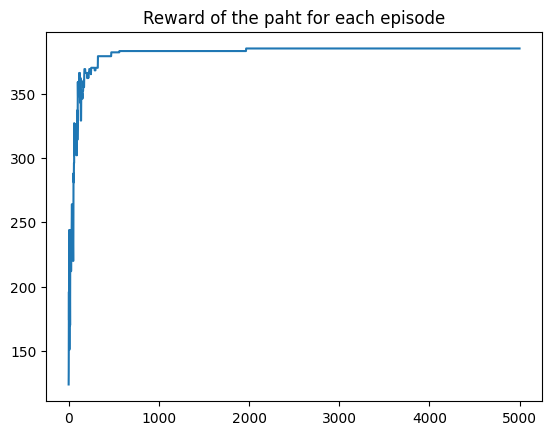

In [ ]:
plt.plot(a)
plt.title('Reward of the paht for each episode')

In [ ]:
arg_highest

1967